In [1]:
import numpy as np
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [3]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
fnames = get_image_files(path/"images")

In [4]:
def label_func(fn): 
    """"""
    return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [5]:
loaders = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

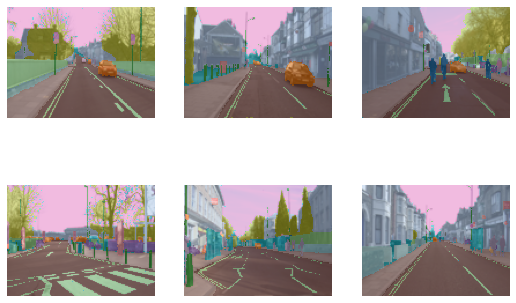

In [6]:
loaders.show_batch(max_n=6)

In [7]:
learn = unet_learner(loaders, resnet34)

In [8]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,3.035795,2.350167,00:48


epoch,train_loss,valid_loss,time
0,1.759167,1.793765,00:48
1,1.592692,1.441123,00:49


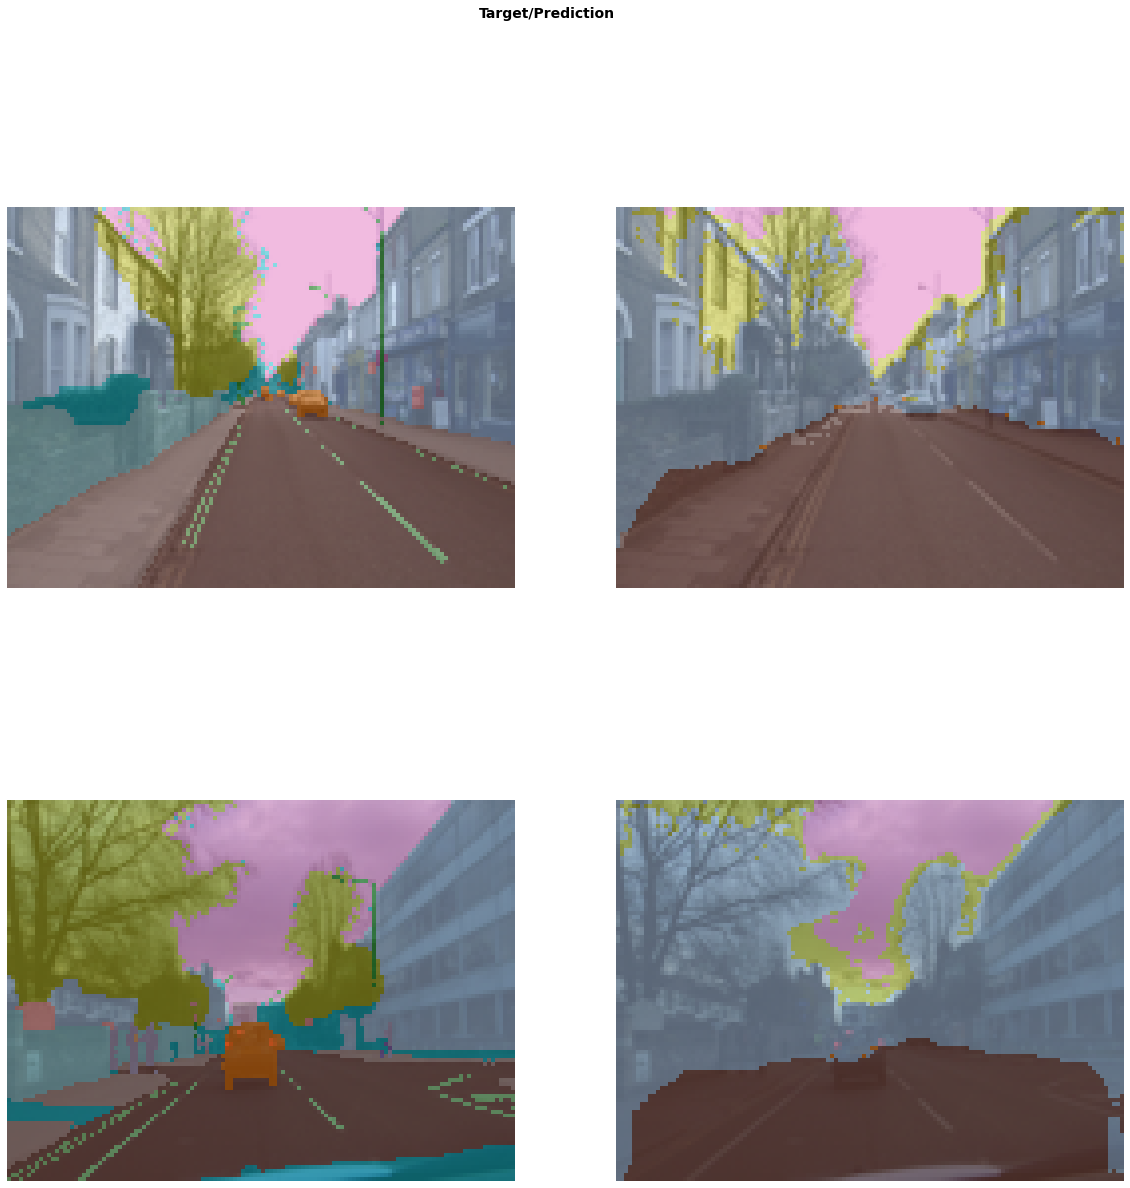

In [9]:
learn.show_results(max_n=6, figsize=(10,10))

In [10]:
learn.save('unet_test')

Path('/Users/ygx/.fastai/data/camvid_tiny/models/unet_test.pth')